In [1]:
import sys
sys.path.append('..')

from olfactory_navigation import Environment, Agent
from olfactory_navigation.agents import FSVI_Agent
from olfactory_navigation.simulation import run_test, SimulationHistory
from olfactory_navigation.test_setups import run_all_starts_test

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import cupy as cp

In [2]:
from cupy.cuda import runtime as cuda_runtime
cuda_runtime.setDevice(0)

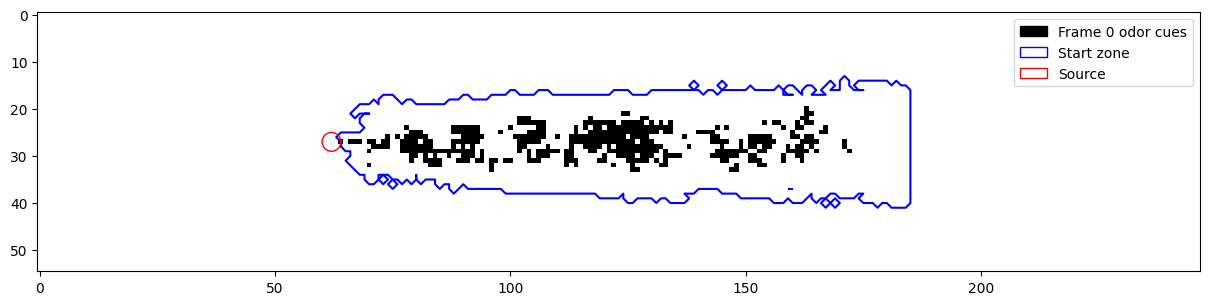

In [3]:
# data_path = "/storage/rando/data/nose_data_27_123.npy" # INSERT YOUR PATH
data_path = "G:\\My Drive\\Documents\\Universita di Genova\\Pimlb work\\nose_data_27_123.h5"

env = Environment(data_file=data_path,
                  data_source_position=[13, 0],
                  source_radius=2,
                  margins=[14, 62],
                  boundary_condition='wrap_vertical',
                  start_zone='odor_present',
                  odor_present_threshold=3e-6)

env.plot()

In [4]:
env.save(force=True)

Environment saved to: ./Env-55_247-marg_14_14_62_62-edge_wrap_vertical-start_odor_present-source_27_62_radius2


In [4]:
ag = FSVI_Agent(env)

[Warning] The whole dataset is being querried, it will be reshaped at this time. To avoid this, avoid querrying environment.data directly.


In [5]:
_ = ag.train(expansions=10, force=True, use_gpu=True)

[07/17/2024, 23:19:35] MDP_policy, not provided. Solving MDP with Value Iteration...
[07/17/2024, 23:19:35] Sending Model to GPU...
[07/17/2024, 23:19:36]     > Done in 1.409s


  0%|          | 0/1000 [00:00<?, ?it/s]

Summary of Value Iteration run
  - Model: 13585-state, 4-action
  - Converged in 918 iterations and 2.4555 seconds
  - Took on average 0.0027s per iteration


Expansions:   0%|          | 0/10 [00:00<?, ?it/s]

Summary of Point Based Value Iteration run
  - Model: 13585 state, 4 action, 3 observations
  - Converged or stopped after 10 expansion steps and 10 backup steps.
  - Resulting value function has 31 alpha vectors.
  - Converged in 13.9654s

  - Expand function took on average 0.7849s and yielded on average 44.30 beliefs per iteration. (0.0755s/it/belief)
  - Backup function took on average 0.6117s and yielded on average 2.70 alpha vectors per iteration. (0.1210s/it/alpha)
  - Pruning function took on average 0.0000s and yielded on average prunings of 0.00 alpha vectors per iteration.


[Warning] 'as_grid' parameter set to False but state count is >3 so it will be plotted as a grid


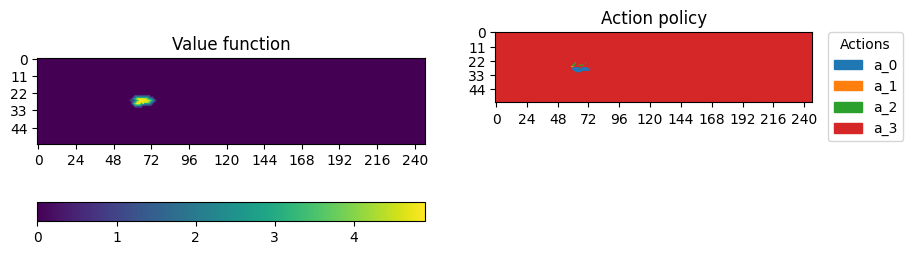

In [6]:
ag.value_function.plot()

In [7]:
# ag.save(force=False, save_environment=False)

In [8]:
hist = run_all_starts_test(ag, use_gpu=True)
# hist = run_test(n=100, agent=ag, time_shift=2400, use_gpu=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulations done in 63.742s:
Simulations reached goal: 1969/2393 (424 failures (reached horizon: 424)) (82.28% success)
 - Average step count:                 250.164 +- 350.31 (Successfull only: 88.696 +- 44.71)
 - Extra steps:                        179.131 +- 362.44 (Successful only: 11.392 +- 27.21)
 - Average discounted rewards (ADR):   0.371 +- 0.24 (Successfull only: 0.450 +- 0.19)
 - Tmin/T:                             0.762 +- 0.35 (Successful only: 0.917 +- 0.13)


In [9]:
hist.analysis_df

,y,x,optimal_steps_count,converged,reached_horizon,steps_taken,discounted_rewards,extra_steps,t_min_over_t
mean,NaN,NaN,NaN,0.822817,0.177183,250.164229,0.370550,179.130798,0.762198
standard_deviation,NaN,NaN,NaN,0.381824,0.381824,350.311865,0.244634,362.439462,0.353214
success_mean,NaN,NaN,NaN,1.0,0.0,88.696293,0.450334,11.392077,0.917303
success_standard_deviation,NaN,NaN,NaN,0.0,0.0,44.710089,0.191900,27.210050,0.125476
run_0,14.0,171.0,120.0,True,False,142.000000,0.239992,22.000000,0.845070
...,...,...,...,...,...,...,...,...,...
run_2388,40.0,178.0,127.0,True,False,127.000000,0.279042,0.000000,1.000000
run_2389,40.0,181.0,130.0,True,False,132.000000,0.265366,2.000000,0.984848
run_2390,40.0,182.0,131.0,True,False,133.000000,0.262713,2.000000,0.984962
run_2391,40.0,183.0,132.0,True,False,136.000000,0.254910,4.000000,0.970588


In [10]:
hist.save()

Simulations saved to: ./Simulations-s_55_247-n_2393-20240717_232141-horizon_1000.csv
Simulation's analysis saved to: ./Simulations-s_55_247-n_2393-20240717_232141-horizon_1000-analysis.csv


In [11]:
loaded_hist = SimulationHistory.load_from_file('./Simulations-s_55_247-n_2393-20240717_232141-horizon_1000.csv', agent=ag)

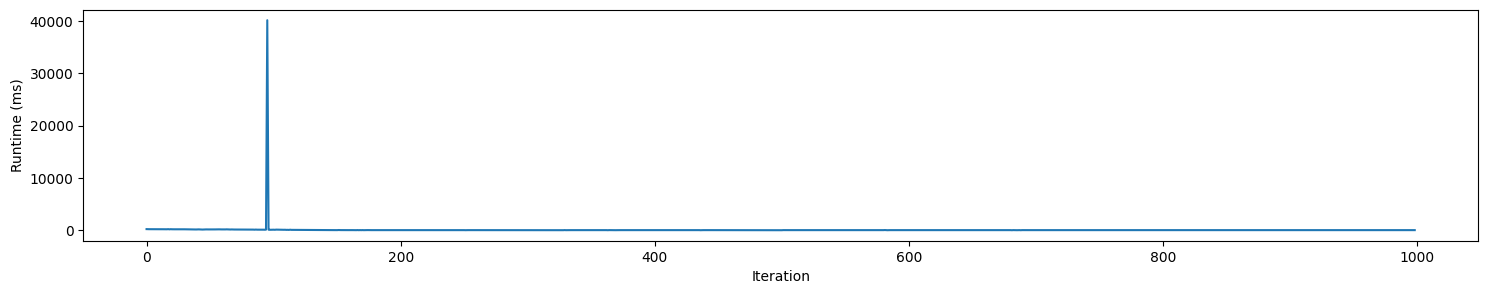

In [12]:
loaded_hist.plot_runtimes()

In [15]:
hist2 = SimulationHistory.load_from_file('./Simulations-s_55_247-n_2393-20240717_232141-horizon_1000.csv', environment=env, agent=ag)

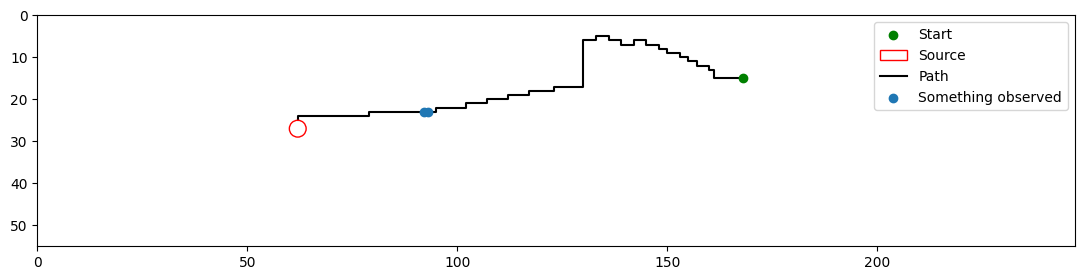

In [17]:
hist2.plot(3)